# COE 292 - Spring 2023
## Programming Assignmnet 1
____________

### READ THESE INSTRUCTIONS CAREFULLY
- Your submission is **auto-graded** and checked for **similarity**. 
- Detected similarity and/or failure to follow these instructions automatically results in a **ZERO** score.
- The assignment is to be completed **individually**.
- Complete the functions marked below by <span style="color:green">*## YOUR CODE HERE*</span>. Do not change anything else, as this may break the entire code and result in getting a **ZERO** score.
- You are **NOT** allowed to use any machine learning packages such as scikit-learn. You may, however, add additional code blocks that you think necessary. 
- <span style="color:red">**DO NOT CHNAGE THE NAME OF THIS FILE**</span>. The submitted file **MUST** be named **"knn.ipynb"**.
- When you submit your code, your score (out of 20) shows immediately. You can resubmit as many time as you wish to improve your score.
---

## k-NN Algorithm
- **20 points**
- **Due Saturday, March 11, 11:59 pm**

### Overview
k-NN is a supervised machine learning algorithm that can be used for classification. The algorithm perfoms classification based on *similarity* using a **distance measure**. 

In this programming assignment, you are required to implement the k-NN algorithm from **scratch**, using the following distance measures:  

- **Euclidean distance:** Given two vectors $x = <x_1, x_2, .., x_n>$, and $y = <y_1, y_2, .., y_n>$, the Euclidean distance, $d(x, y)$, is defined as

$$d(x, y) = \sqrt{\sum_{i=1}^{N}({y_i}-{x_i})^2}$$

- **Manhattan Distance:** Given two vectors $x = <x_1, x_2, .., x_n>$, and $y = <y_1, y_2, .., y_n>$, the Manhattan distance is defined as

$$d(x, y) = \sum_{i=1}^{N}|y_i - x_i|$$

---

### Toy training and test data

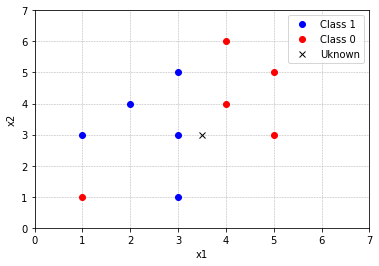

In [1]:
# DO NOT CHNAGE THIS CELL

# training and test data 
data = [[2.0,4.0,1],
        [3.0,5.0,1],
        [1.0,3.0,1],
        [3.0,3.0,1],
        [3.0,1.0,1],
        [1.0,1.0,0],
        [5.0,3.0,0],
        [4.0,4.0,0],
        [4.0,6.0,0],
        [5.0,5.0,0]]
test_data = [3.5,3.0]

# plotting the data
import matplotlib.pyplot as plt
b_x, b_y = [d[0] for d in data if d[2] == 1], [d[1] for d in data if d[2] == 1]
r_x, r_y = [d[0] for d in data if d[2] == 0], [d[1] for d in data if d[2] == 0]
plt.plot(b_x,b_y,'bo',label='Class 1')
plt.plot(r_x,r_y,'ro',label='Class 0')
plt.plot(test_data[0],test_data[1],'kx',label='Uknown')
plt.grid(True, linestyle='dashed', linewidth=0.5)
plt.axis([0.0,7.0,0.0,7.0])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show(block=False)

### Euclidean Distance
#### <span style="color:green">*Complete the following code block*</span>

In [19]:
from math import *
def e_dist(x, y):
    '''
    Compute the Euclidean distance between two vectors x and y
    
    Arguments:
        x,y     : two vectors stored as lists
    
    return:
        dist    : Euclidean distance between the two vectors x and y
    '''
    ## YOUR CODE HERE
    summation = 0
    for i in range(len(x)):
        summation += (x[i] - y[i])**2
    distance = sqrt(summation)
    return distance

### Manhattan Distance
#### <span style="color:green">*Complete the following code block*</span>

In [20]:
def m_dist(x, y):
    '''
    Compute the Manhattan distance between two vectors x and y
    
    Arguments:
        x,y     : two vectors stored as lists
    
    return:
        dist    : Manhattan distance between the two vectors x and y
    '''
    ## YOUR CODE HERE
    summation = 0
    for i in range(len(x)):
        summation += abs(x[i] - y[i])
    return summation

### k-NN Algorithm
#### <span style="color:green">*Complete the following code block*</span>

In [43]:
def knn(data, u, k, dist_fun=e_dist):
    '''
    Predict the class of a given vector u based on the labels of its 
    k nearest neighbors in the given data.
    
    Arguments:
        data     : The training samples stored as a list of lists: 
                   [[x00,x01,..,y0],[x10,x10,..,y1],..], where xij is the jth feature 
                   from the ith data point while yi is its actual label (0 or 1)
        u        : A new vector with unknow label. It is stored as a list.
        k        : Number of neighbors
        dist_fun : function to compute the distances (default Euclidean distance e_dist)

    return:
        label: predicated label (0 or 1)
    '''
    ## YOUR CODE HERE
    distances = []
    indexes = []
    zerosCounter = 0
    onesCounter = 0
    for i in data:
        distances.append(dist_fun(i[:-1],u))
        
    for i in range(k):
        minimum = min(distances)
        indexes.append(distances.index(minimum))
        distances.remove(minimum)
        
    for i in indexes:
        if data[i][-1] == 1:
            onesCounter += 1
        else:
            zerosCounter += 1
    if onesCounter > zerosCounter:
        return 1
    else:
        return 0  

### Running the knn function for k = 1,3,5, and 7 using the two distance functions

In [42]:
# DO NOT CHNAGE THIS CELL

print('k\tClass[Euc]\tClass[Man]')
print('----------------------------------')
for k in [1,3,5,7]:
    print(k,'\t  ', knn(data, test_data, k),'\t\t  ',knn(data, test_data, k,m_dist))

k	Class[Euc]	Class[Man]
----------------------------------
1 	   1 		   1
3 	   0 		   0
5 	   1 		   1
7 	   1 		   1
